## Data Analysis / Science on Titanic dataset

### Goal: Predict survival using Logistic Regression

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
test_df = pd.read_csv('test.csv')

train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Cabin missing in 78% of rows, I'll drop that column.

In [4]:
train_df.fillna(0, inplace=True) #Fill na values of set
test_df.fillna(0, inplace = True)

### Exploratory Analysis:
#### Plot variables against survived to see relationships

### Consider doing a Decision Tree here

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### From this output, we can see that 38% of passengers from the training set survived.

In [8]:
#Split age into a child/adult column to see effect
train_df['AgeRange'] = pd.cut(train_df['Age'], [0, 15, 80], labels=['child', 'adult'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,adult


In [9]:
#Split fare into Low/High to see effect
train_df['FareRange'] = pd.cut(train_df['Fare'], [0, 100, 512], labels=['Low', 'High'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,adult,Low


In [11]:
#Drop the useless data 
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Relationships with Survival:

In [13]:
survived_by_fare = train_df.groupby('FareRange')['Survived'].mean()
survived_by_fare

FareRange
Low     0.36695
High    0.72000
Name: Survived, dtype: float64

### 72% of people with Fare >= 100 survived. (mean = 32)
#### This could be captured in Class variable, however. 

In [14]:
survived_by_class = train_df.groupby('Pclass')['Survived'].mean()
survived_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 62% of passengers in first class survived, compared to the .242 in third class.
#### I should use indicator variables for First and Second class to capture this. 

In [15]:
survived_by_sex = train_df.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### over 74% of female passengers survived, meaning this is my most useful variable.  

In [17]:
survived_by_age = train_df.groupby('AgeRange')['Survived'].mean()
survived_by_age

AgeRange
child    0.590361
adult    0.381933
Name: Survived, dtype: float64

In [18]:
survived_by_parch = train_df.groupby('Parch')['Survived'].mean()
survived_by_parch

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

### Oddly, we see having 3 children with you gives you a higher chance for survival, but low survival above that. 
#### This could be a lurking variable with class

In [19]:
survived_by_sibsp = train_df.groupby('SibSp')['Survived'].mean()
survived_by_sibsp

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

### From the last two outputs, we see having a large family hurts your chances more than having no family at all. 

(0.0, 1.0)

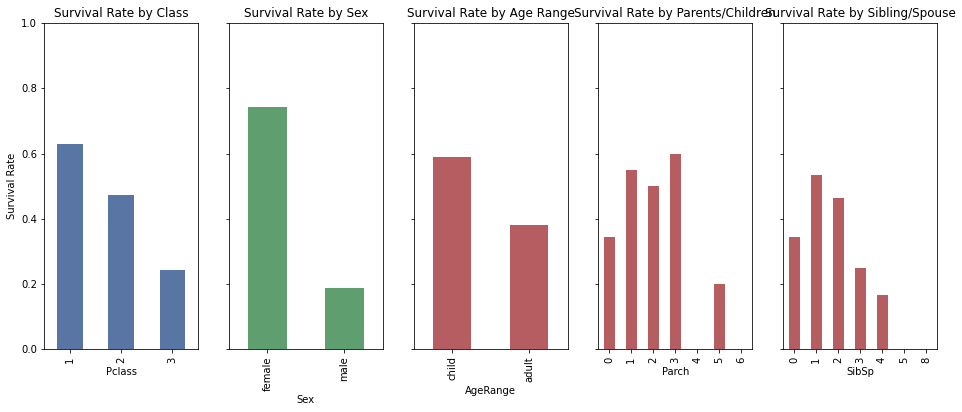

In [20]:
#Plot these relationships
fig, (axis1,axis2,axis3,axis4,axis5) = plt.subplots(1, 5, figsize=(16,6))

ax = survived_by_class.plot.bar(ax=axis1, color='#5975A4', title='Survival Rate by Class', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_by_age.plot.bar(ax=axis3, color='#B55D60', title='Survival Rate by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_by_parch.plot.bar(ax=axis4, color='#B55D60', title='Survival Rate by Parents/Children', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_by_sibsp.plot.bar(ax=axis5, color='#B55D60', title='Survival Rate by Sibling/Spouse', sharey=True)
ax.set_ylim(0.0,1.0)

In [22]:
fare_by_sex = train_df.groupby('Sex')['Fare'].mean()
fare_by_sex

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

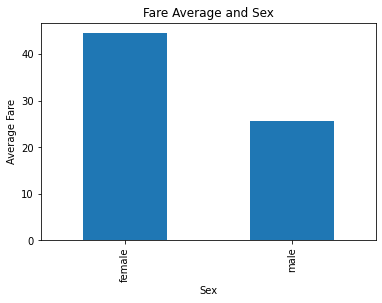

In [23]:
ax = fare_by_sex.plot.bar(title='Fare Average and Sex')
ax.set_ylabel('Average Fare')

### Women had higher fares, does this mean more women in first class?

In [24]:
fare_by_class_sex = train_df.groupby(['Pclass', 'Sex'])['Fare'].mean()
fare_by_class_sex

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

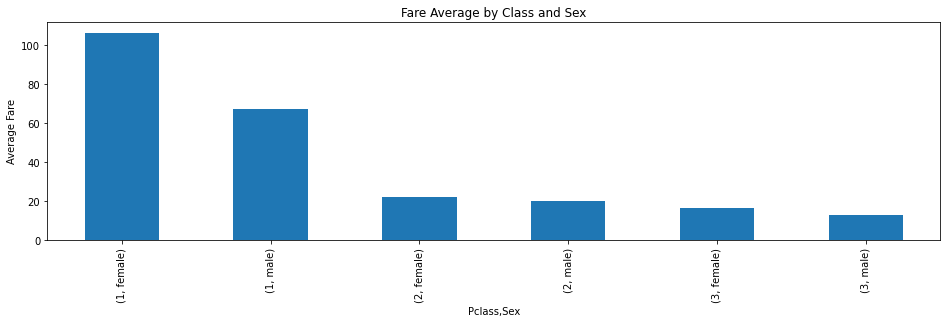

In [25]:
ax = fare_by_class_sex.plot.bar(figsize=(16,4), title='Fare Average by Class and Sex')
ax.set_ylabel('Average Fare')

### We can see that fares were very similar in the other two classes, but women in first class payed much more. This variation should be captured by Class1 and Female indicator variables.

### Now investigating Embark:

In [26]:
embarked = train_df.groupby('Embarked').mean()
embarked['Count'] = train_df['Embarked'].value_counts()
embarked

,Survived,Pclass,Age,SibSp,Parch,Fare,Count
Embarked,,,,,,,
0,1.000000,1.000000,50.000000,0.000000,0.000000,80.000000,2
C,0.553571,1.886905,23.844762,0.386905,0.363095,59.954144,168
Q,0.389610,2.909091,10.214286,0.428571,0.168831,13.276030,77
S,0.336957,2.350932,25.330357,0.571429,0.413043,27.079812,644


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

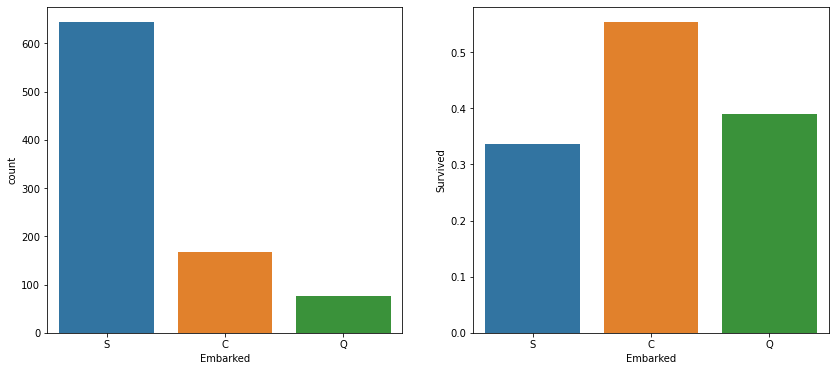

In [28]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='Embarked', data=train_df, order=['S','C','Q'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=['S','C','Q'], ax=axis2)

### This clearly shows a disproportional amount from port C survived. 
#### The value count output shows that port C had vastly more first class passengers than the other two. 
#### Survival rates from Embarked should be shown by Class indicator variables. 

## Feature Selection:
### I will use Class, Sex, AgeRange, and SibSp^2 to predict survival. 
#### I chose to use SibSp^2 due to the parabolic graph shown in SibSp vs Survival

In [29]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange,FareRange
0,0,3,male,22.0,1,0,7.2500,S,adult,Low
1,1,1,female,38.0,1,0,71.2833,C,adult,Low
2,1,3,female,26.0,0,0,7.9250,S,adult,Low
3,1,1,female,35.0,1,0,53.1000,S,adult,Low
4,0,3,male,35.0,0,0,8.0500,S,adult,Low


In [30]:
train_df = pd.get_dummies(train_df, columns=['Sex'])

In [31]:
train_df = pd.get_dummies(train_df, columns=['Pclass'])

In [37]:
train_df = pd.get_dummies(train_df, columns=['AgeRange'])

In [33]:
train_df['SibSp^2'] = np.square(train_df['SibSp'])

In [38]:
#train['Sex_female'] = pd.get_dummies(train, columns=['Sex'])['Sex_female']
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,FareRange,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp^2,AgeRange_child,AgeRange_adult
0,0,22.0,1,0,7.2500,S,Low,0,1,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,C,Low,1,0,1,0,0,1,0,1
2,1,26.0,0,0,7.9250,S,Low,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,S,Low,1,0,1,0,0,1,0,1
4,0,35.0,0,0,8.0500,S,Low,0,1,0,0,1,0,0,1


### Since the test set doesn't have 'Survived' by design, I will train-test-split the training data to obtain an accuracy measurement.

In [39]:
features = train_df.drop(['Survived', 'Age' , 'SibSp', 'Parch', 'Sex_male', 'Pclass_2', 'Fare', 'FareRange', 'Embarked', 'AgeRange_adult'], axis=1)
features.head()

,Sex_female,Pclass_1,Pclass_3,SibSp^2,AgeRange_child
0,0,0,1,1,0
1,1,1,0,1,0
2,1,0,1,0,0
3,1,1,0,1,0
4,0,0,1,0,0


In [41]:
targ = train_df['Survived']
targ.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, targ, test_size=0.33, random_state=42)

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


### .83 accuracy is fairly good. I will use this on the given test set to predict survival.
#### I now need to get dummies for the test set, same as the training set above.

In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [46]:
test_df['AgeRange'] = pd.cut(test_df['Age'], [0, 15, 80], labels=['child', 'adult'])

In [47]:
test_df = pd.get_dummies(test_df, columns=['Sex'])

In [49]:
test_df = pd.get_dummies(test_df, columns=['AgeRange'])

In [50]:
test_df['SibSp^2'] = np.square(test_df['SibSp'])

In [52]:
test_df = pd.get_dummies(test_df, columns=['Pclass'])

In [57]:
test_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,AgeRange_child,AgeRange_adult,SibSp^2,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,Q,0,1,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,S,1,0,0,1,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,Q,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,S,0,1,0,1,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,S,1,0,0,1,1,0,0,1


In [58]:
test_features = test_df.drop(['PassengerId', 'Name','Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Sex_male', 'Fare', 'Embarked', 'Sex_male', 'AgeRange_adult', 'Pclass_2'], axis=1)
test_features.head()

,Sex_female,AgeRange_child,SibSp^2,Pclass_1,Pclass_3
0,0,0,0,0,1
1,1,0,1,0,1
2,0,0,0,0,0
3,0,0,0,0,1
4,1,0,1,0,1


In [59]:
x_train = features
x_test = test_features

In [60]:
y = train_df['Survived']

In [61]:
# I want to fit Survived ~ Sex_female + AgeRange_child + Pclass_1 + Pclass_3 + SibSp^2

logmodel = LogisticRegression()
logmodel.fit(x_train, y)

LogisticRegression()

In [33]:
y_pred = logmodel.predict(x_test)

In [62]:
#One way to count
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 187, 1: 108}

### My model predicted 108 survive out of 295 passengers

In [64]:
num = (np.count_nonzero(y_pred == 1)/len(y_pred))
print("Predicted Survival rate = ", f'{num:.3}')

Predicted Survival rate =  0.366


### In the future, I plan to take this analysis further with more machine learning techniques, such as SVM